In [ ]:
# https://scikit-image.org/docs/dev/auto_examples/applications/plot_morphology.html
# http://www.dabi.temple.edu/~shape/MPEG7/dataset.html
# https://doc.rero.ch/record/316838/files/11263_2010_Article_387.pdf

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread
from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import white_tophat, black_tophat
from skimage.morphology import skeletonize, convex_hull_image
from skimage.morphology import disk

In [2]:
# Salt and pepper noise
def salt_and_pepper(IMG):
    img = IMG.copy()
    n_rows, n_cols = img.shape
    for row in range(n_rows):
        for col in range(n_cols):
            thresh = np.random.rand()
            if thresh > 0.98:
                img[row, col] = 1
            elif thresh < 0.02:
                img[row, col] = 0
    return img

(252, 329)


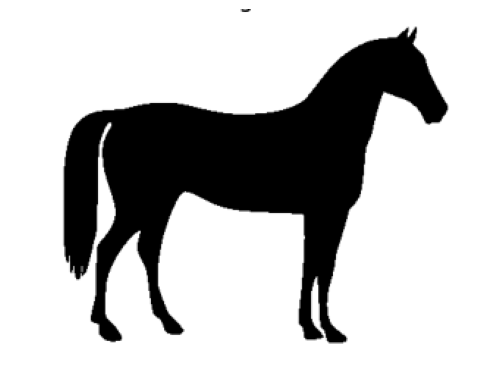

In [4]:
# Read image
IMG = imread('Horse-BW.png', as_gray=True)
print(IMG.shape)

plt.imshow(IMG, cmap='gray')
plt.axis('off')
plt.show()

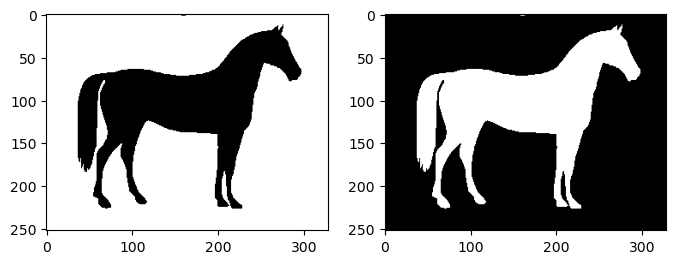

In [5]:
# Binarize it
BW1 = IMG > 0.5
BW  = IMG < 0.5

plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.imshow(BW1, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(BW, cmap='gray')
plt.show()

In [6]:
# Create kernel
kernel = disk(2)
print(kernel)

[[0 0 1 0 0]
 [0 1 1 1 0]
 [1 1 1 1 1]
 [0 1 1 1 0]
 [0 0 1 0 0]]


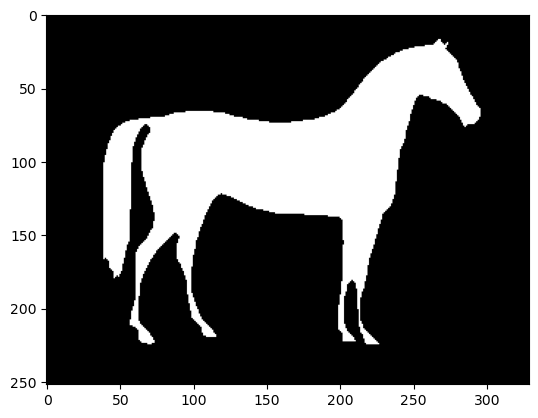

In [7]:
# Erode
eroded = erosion(BW, kernel)

plt.imshow(eroded, cmap='gray')
plt.show()

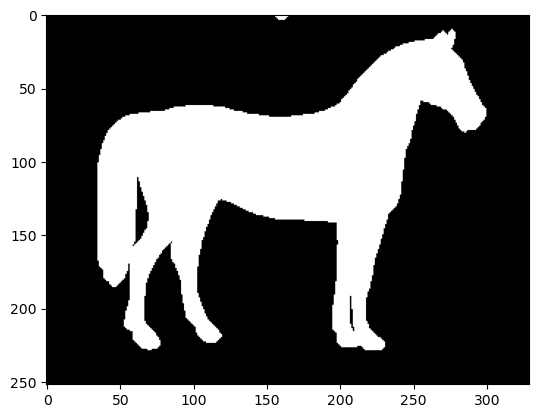

In [8]:
# Dilate
dilated = dilation(BW, kernel)

plt.imshow(dilated, cmap='gray')
plt.show()

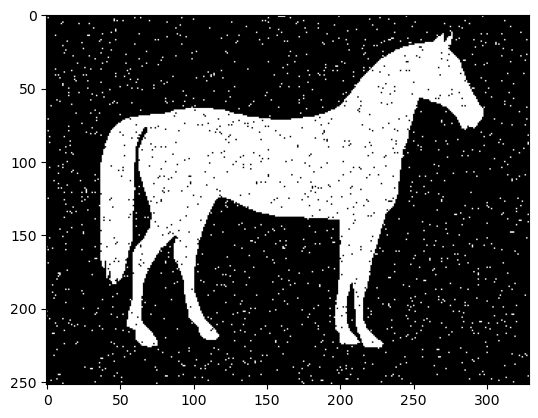

In [9]:
# Add noise
BWnoise = salt_and_pepper(BW)

plt.imshow(BWnoise, cmap='gray')
plt.show()

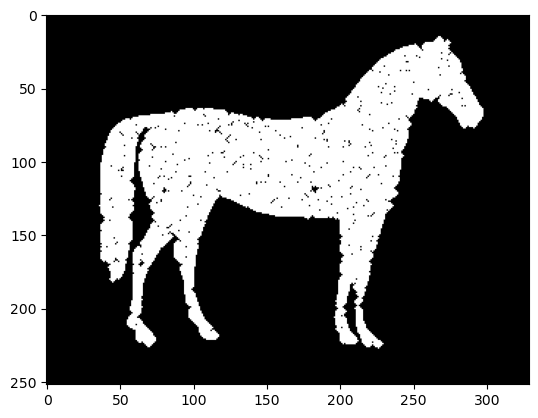

In [10]:
# Opening
opened = opening(BWnoise, kernel)

plt.imshow(opened, cmap='gray')
plt.show()

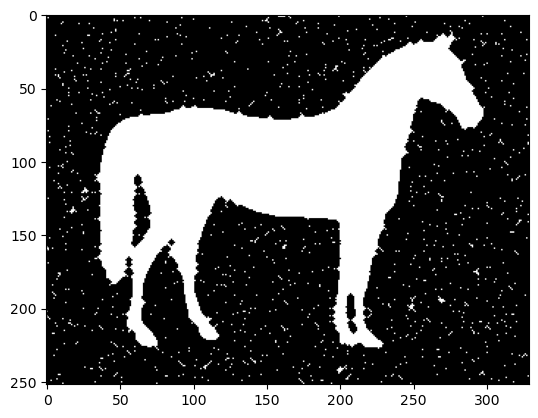

In [11]:
# Closing
closed = closing(BWnoise, kernel)

plt.imshow(closed, cmap='gray')
plt.show()

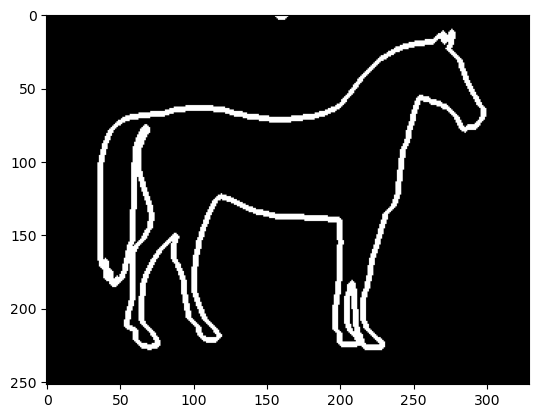

In [12]:
# Morphological gradient
morph_grad = dilated.astype('int8') - eroded.astype('int8')

plt.imshow(morph_grad, cmap='gray')
plt.show()

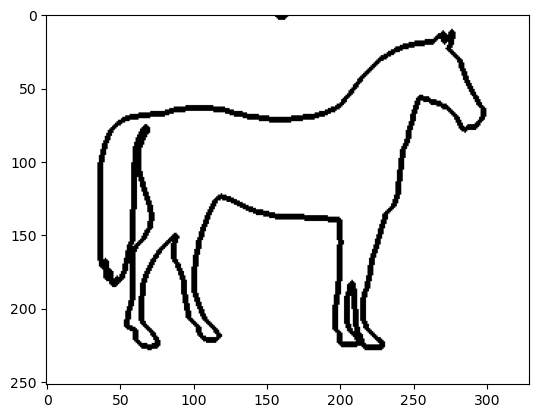

In [13]:
# Morphological gradient II
morph_grad2 = eroded.astype('int8') - dilated.astype('int8')

plt.imshow(morph_grad2, cmap='gray')
plt.show()

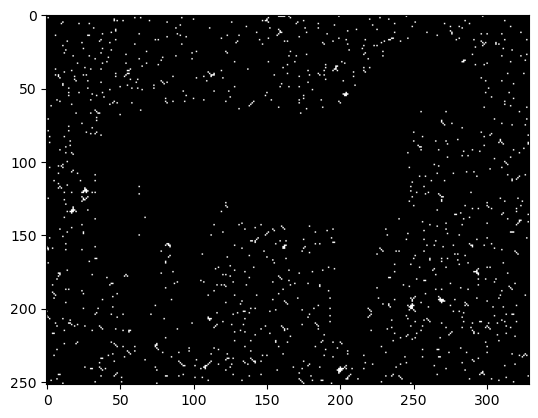

In [14]:
# White tophat
wth = white_tophat(closed, kernel)

plt.imshow(wth, cmap='gray')
plt.show()

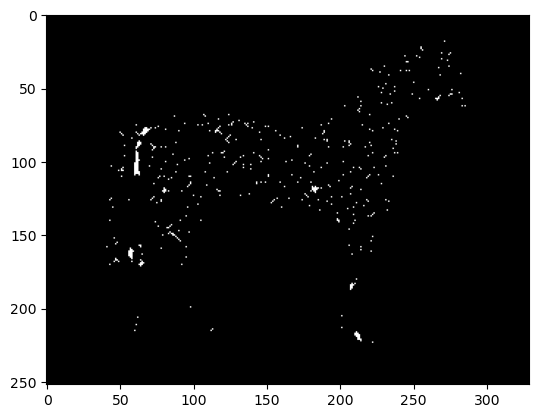

In [15]:
# Black tophat
bth = black_tophat(opened, kernel)

plt.imshow(bth, cmap='gray')
plt.show()

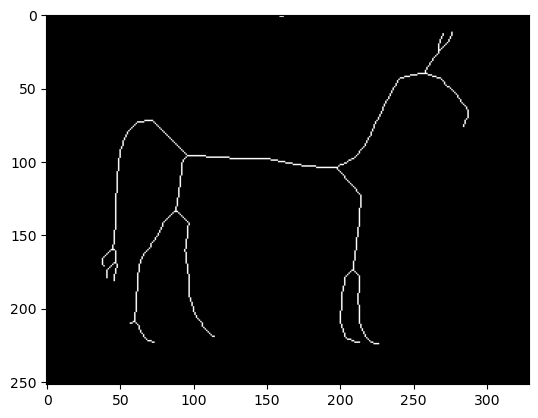

In [16]:
# Skeleton
skel = skeletonize(BW)

plt.imshow(skel, cmap='gray')
plt.show()

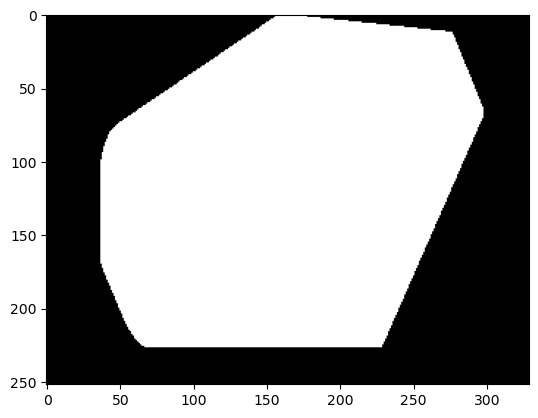

In [17]:
# Convex hull
hull = convex_hull_image(BW)

plt.imshow(hull, cmap='gray')
plt.show()